In [21]:
# Import libraries
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from urllib.request import urlopen, Request
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [22]:

import nltk

#ONLY NEED THIS THE FIRST TIME
#this will open a window - if  you have x-server running.  Thankfully I do
# nltk.download()

# Choose the download directory /usr/share/nltk_data
# See https://www.nltk.org/data.html for details

Test some things... We'll put these all together later

In [23]:
#test the nltk downloads
from nltk.corpus import brown
# brown.words()

In [24]:
# headers = {
#         "User-Agent": 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36'
#     }
# finwiz_url = 'https://finviz.com/quote.ashx?t='
# news_tables = {}

In [25]:
# ticker = "AAPL"
# url = finwiz_url + 'AAPL'
# req = Request(url=url,headers=headers) 
# resp = urlopen(req) 
# html = BeautifulSoup(resp, features="lxml")
# news_table = html.find(id='news-table')
# news_tables[ticker] = news_table

In [26]:
# try:
    
#     df = news_tables['AAPL']
#     df_tr = df.findAll('tr')

#     print ('\n')
#     print ('Recent News Headlines for {}: '.format(ticker))
    
#     for i, table_row in enumerate(df_tr):  # Cycle thru the table rows
#         a_text = table_row.a.text  # get the text from the <a> tags
#         td_text = table_row.td.text
#         td_text = td_text.strip()  # get date/time information
#         print(a_text,'(',td_text,')')
#         if i == n-1:
#             break
# except KeyError:
#     pass

### Okay, lets wrap this up into a loop, now that it works...

In [27]:
# Parameters 
n = 3 #the # of article headlines displayed per ticker
tickers = ['AAPL', 'NVDA', 'TSLA', 'MSFT']

In [28]:
# Get Data
headers = {
        "User-Agent": 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36'
    }
finwiz_url = 'https://finviz.com/quote.ashx?t='
news_tables = {}

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers=headers) 
    resp = urlopen(req)    
    html = BeautifulSoup(resp, features="lxml")
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table



In [29]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

In [30]:
# just print out the latest

try:
    for ticker in tickers:
        df = news_tables[ticker]
        df_tr = df.findAll('tr')
    
        print ('\n')
        print ('Recent News Headlines for {}: '.format(ticker))
        
        for i, table_row in enumerate(df_tr):
            a_text = table_row.a.text
            td_text = table_row.td.text
            td_text = td_text.strip()
            print(a_text,'(',td_text,')')
            if i == n-1:
                break
except KeyError:
    pass



Recent News Headlines for AAPL: 
Magnificent Seven Stocks: Nvidia Stock Falls, Tesla Slides Ahead Of Earnings; Google Earnings Next ( Today 03:22PM )
Why It's Time to Buy the Dip in Tech Stocks ( 02:36PM )
Apple likely to release foldable iPhone as early as 2026, the Information reports ( 12:53PM )


Recent News Headlines for NVDA: 
Broadcom To Challenge Nvidia Dominance? Analyst Says Jensen Huang-Led Chip Giant's Competitor Is 'Catching Up' ( Today 04:45PM )
Nvidia Proves It Can Take A Punch, Remains Among 24 'Perfect' Stocks ( 04:00PM )
Why Arm Holdings Stock Is Jumping Today ( 03:56PM )


Recent News Headlines for TSLA: 
Tesla Earnings Fall 43% But EV Giant Sees Record Revenue In 'Difficult Operating Environment' ( Today 04:54PM )
Why Ford is a buy, but Tesla is risky: Good Buy or Goodbye ( 04:37PM )
Tesla demand story has made a shift for the positive: Wedbush's Dan Ives ( 04:30PM )


Recent News Headlines for MSFT: 
Alphabet earnings top estimates as cloud business gains steam, 

In [31]:
#look at the HTML for reference
news_tables.items()

dict_items([('AAPL', <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer news-table" id="news-table" width="100%">
<tr class="cursor-pointer has-label" onclick="trackAndOpenNews(event, 'Investor\u0027s Business Daily', 'https://finance.yahoo.com/m/4205eaa9-f620-3a0b-a81a-0e82c7c9fd0b/magnificent-seven-stocks%3A.html');">
<td align="right" width="130">
            Today 03:22PM
        </td>
<td align="left">
<div class="news-link-container">
<div class="news-link-left">
<a class="tab-link-news" href="https://finance.yahoo.com/m/4205eaa9-f620-3a0b-a81a-0e82c7c9fd0b/magnificent-seven-stocks%3A.html" rel="nofollow" target="_blank">Magnificent Seven Stocks: Nvidia Stock Falls, Tesla Slides Ahead Of Earnings; Google Earnings Next</a>
</div>
<div class="news-link-right flex gap-1 items-center">
<span>(Investor's Business Daily)</span></div></div></td></tr>
<tr class="cursor-pointer has-label" onclick="trackAndOpenNews(event, 'InvestorPlace', 'https://investorplace.co

In [32]:
# Iterate through the news, scraping the text
parsed_news = []
for file_name, news_table in news_tables.items():  # use the ticker as the file name
    for x in news_table.findAll('tr'):
        if x.a == None:
            continue
        else:
            text = x.a.text 
            date_scrape = x.td.text.split()  # text

            if len(date_scrape) == 1:  # time
                time = date_scrape[0]
                
            else:
                date = date_scrape[0]  # date and time
                time = date_scrape[1]

            ticker = file_name.split('_')[0]  # Ticker Symbol
            
            parsed_news.append([ticker, date, time, text])
        

In [33]:
parsed_news

[['AAPL',
  'Today',
  '03:22PM',
  'Magnificent Seven Stocks: Nvidia Stock Falls, Tesla Slides Ahead Of Earnings; Google Earnings Next'],
 ['AAPL', 'Today', '02:36PM', "Why It's Time to Buy the Dip in Tech Stocks"],
 ['AAPL',
  'Today',
  '12:53PM',
  'Apple likely to release foldable iPhone as early as 2026, the Information reports'],
 ['AAPL', 'Today', '12:32PM', 'Spotify Keeps the Profit Tune Humming'],
 ['AAPL',
  'Today',
  '12:08PM',
  'Meta CEO Zuckerberg calls on industry to adopt open-source AI, debuts high-powered Llama AI model'],
 ['AAPL',
  'Today',
  '12:01PM',
  "What Verizon's Low Smartphone Upgrades Mean For Apple"],
 ['AAPL',
  'Today',
  '11:28AM',
  'Apple wants to stop spending so much money making TV shows'],
 ['AAPL',
  'Today',
  '11:21AM',
  'Behind the Historic Small Cap Breakout, and Investing Lessons for Millennials'],
 ['AAPL',
  'Today',
  '08:57AM',
  "Meta's reality check: Inside the $45 billion cash burn at Reality Labs"],
 ['AAPL',
  'Today',
  '08:05

## Sentiment Analysis using nltk

This is easiest, as we do not need to clean our text, nor have any manual classification to train on..

In [34]:
# Sentiment Analysis 
analyzer = SentimentIntensityAnalyzer()

columns = ['Ticker', 'Date', 'Time', 'Headline']
news = pd.DataFrame(parsed_news, columns=columns)
scores = news['Headline'].apply(analyzer.polarity_scores).tolist()

df_scores = pd.DataFrame(scores)
news = news.join(df_scores, rsuffix='_right')

In [35]:
news

,Ticker,Date,Time,Headline,neg,neu,pos,compound
0,AAPL,Today,03:22PM,"Magnificent Seven Stocks: Nvidia Stock Falls, ...",0.000,0.769,0.231,0.5994
1,AAPL,Today,02:36PM,Why It's Time to Buy the Dip in Tech Stocks,0.000,1.000,0.000,0.0000
2,AAPL,Today,12:53PM,Apple likely to release foldable iPhone as ear...,0.000,1.000,0.000,0.0000
3,AAPL,Today,12:32PM,Spotify Keeps the Profit Tune Humming,0.000,0.633,0.367,0.4404
4,AAPL,Today,12:08PM,Meta CEO Zuckerberg calls on industry to adopt...,0.000,0.892,0.108,0.1779
...,...,...,...,...,...,...,...,...
395,MSFT,Jul-19-24,04:43PM,S&P 500 Gains and Losses Today: CrowdStrike Tu...,0.179,0.662,0.159,-0.0772
396,MSFT,Jul-19-24,04:41PM,These Chipmakers Could Benefit From Record 202...,0.000,0.786,0.214,0.4588
397,MSFT,Jul-19-24,04:35PM,CrowdStrike Is Deeply Sorry for Windows Outage...,0.107,0.741,0.152,0.1692
398,MSFT,Jul-19-24,04:34PM,Global IT Failure Puts Cyber Firm CrowdStrike ...,0.292,0.708,0.000,-0.5106


In [36]:
aapl = news[news.Ticker == 'AAPL'].sort_values('neg',ascending=False)

In [37]:
import seaborn as sns

<Axes: xlabel='compound', ylabel='Ticker'>

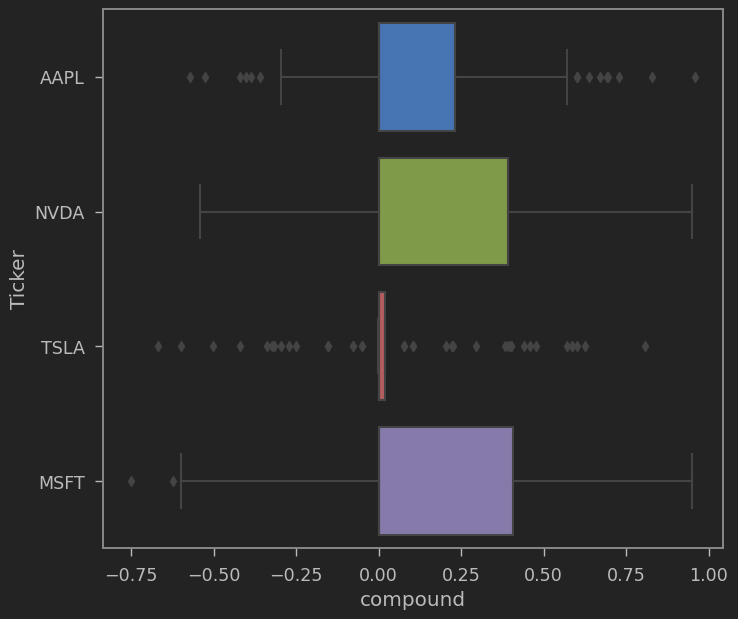

In [38]:
#djt['compound'].hist(bins=50)
#sns.histplot(data = news, x='compound', bins=50, hue = 'Ticker')
sns.boxplot(data=news, y="Ticker", x='compound')

In [39]:

#sns.scatterplot(data = news, x = 'neg', y='pos', hue='Ticker' )

In [40]:
import datetime as dt

In [41]:
# View Data 
try:
    news['Date'] = pd.to_datetime(news.Date).dt.date
except:
    news['Date'] = dt.date.today()  # we get an exception with the word "Today", so...

unique_ticker = news['Ticker'].unique().tolist()
news_dict = {name: news.loc[news['Ticker'] == name] for name in unique_ticker}

values = []
for ticker in tickers: 
    dataframe = news_dict[ticker]
    dataframe = dataframe.set_index('Ticker')
    dataframe = dataframe.drop(columns = ['Headline'])
    print ('\n')
    print (dataframe.head())
    
    mean = round(dataframe['compound'].mean(), 2)
    values.append(mean)
    
df = pd.DataFrame(list(zip(tickers, values)), columns =['Ticker', 'Mean Sentiment']) 
df = df.set_index('Ticker')
df = df.sort_values('Mean Sentiment', ascending=False)
print ('\n')
print (df)



              Date     Time  neg    neu    pos  compound
Ticker                                                  
AAPL    2024-07-23  03:22PM  0.0  0.769  0.231    0.5994
AAPL    2024-07-23  02:36PM  0.0  1.000  0.000    0.0000
AAPL    2024-07-23  12:53PM  0.0  1.000  0.000    0.0000
AAPL    2024-07-23  12:32PM  0.0  0.633  0.367    0.4404
AAPL    2024-07-23  12:08PM  0.0  0.892  0.108    0.1779


              Date     Time  neg    neu    pos  compound
Ticker                                                  
NVDA    2024-07-23  04:45PM  0.0  0.807  0.193    0.2732
NVDA    2024-07-23  04:00PM  0.0  1.000  0.000    0.0000
NVDA    2024-07-23  03:56PM  0.0  1.000  0.000    0.0000
NVDA    2024-07-23  03:22PM  0.0  0.769  0.231    0.5994
NVDA    2024-07-23  03:04PM  0.0  0.855  0.145    0.5233


              Date     Time    neg    neu    pos  compound
Ticker                                                    
TSLA    2024-07-23  04:54PM  0.200  0.800  0.000   -0.5023
TSLA    2024-07-23 

We could also do this with almost any classifier, LogicalRegression, Naieve Bayes, etc...